<a href="https://colab.research.google.com/github/Liies/House_Price_Prediction/blob/main/TD2_Lies_Haouas_Yanis_Fadili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [410]:
import pandas as pd
import numpy as np
import math 
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import average_precision_score as precision
import seaborn as sns
import missingno as msno
np.random.seed(271099)

In [411]:
df=pd.read_csv('/content/sample_data/data immobilier.csv')

In [412]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [413]:
df.shape

(1460, 81)

In [414]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [415]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


##Correlation to the target


In [416]:
dfCorr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['SalePrice'],columns=['Correlation to the target'])
dfCorr.style.background_gradient(cmap=sns.light_palette("g", as_cmap=True))

,Correlation to the target
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## Average sale price following the overall quality of the real estate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


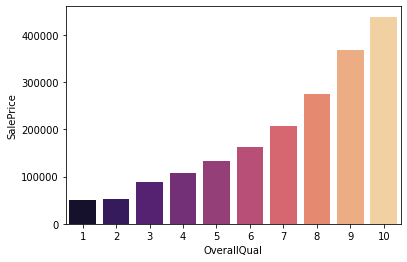

In [417]:
sns.barplot(df.groupby('OverallQual').mean()['SalePrice'].index,df.groupby('OverallQual').mean()['SalePrice'], palette='magma')

## Average sale price following the year of construction of the real estate


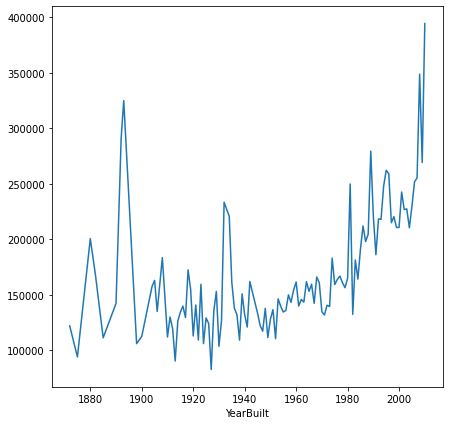

In [418]:
df.groupby('YearBuilt').mean()['SalePrice'].plot(figsize=(7,7))

# Data cleaning

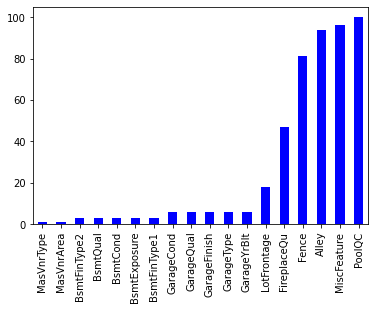

In [419]:
missingValues = round(df.isnull().sum() * 100 / len(df))
missingValues = missingValues[missingValues > 0]
missingValues.sort_values(inplace=True)
missingValues.plot.bar(color="b")

On supprime toute les colonnes avec plus de 50% de valeurs manquantes car ceux sont des features inexploitables en prenant compte le grand nombre de valeurs manquantes

In [420]:
df.drop(df.columns[df.isnull().sum()* 100 / len(df) > 50], axis=1,inplace=True)

In [421]:
df.shape

(1460, 77)

On sait que l'id n'a aucun lien avec le prix de vente, on supprime donc la colone Id

In [422]:
df.drop(["Id"],axis=1,inplace=True)
df.shape

(1460, 76)

# DATA Engeniering

#Catégorie

On va gérer le cas des valeurs manquantes pour colonnes de type catégorie





In [423]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().sum() * 100 / len(df),4)))

MasVnrType: 0.5479% missing values
BsmtQual: 2.5342% missing values
BsmtCond: 2.5342% missing values
BsmtExposure: 2.6027% missing values
BsmtFinType1: 2.5342% missing values
BsmtFinType2: 2.6027% missing values
FireplaceQu: 47.2603% missing values
GarageType: 5.5479% missing values
GarageFinish: 5.5479% missing values
GarageQual: 5.5479% missing values
GarageCond: 5.5479% missing values


On remplace les Nan par "Missing" dans les colonnes de type catégorie qui contiennent des nan

In [424]:
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [425]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
677,30,RL,52.0,9022,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,8,1924,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,768,768,GasA,Ex,Y,SBrkr,792,0,0,792,0,0,1,0,2,1,Gd,5,Typ,0,Missing,Detchd,1924.0,Unf,1,240,Fa,Fa,N,316,0,120,0,0,0,0,5,2009,WD,Normal,109500
311,20,RL,50.0,8000,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1948,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,680,Unf,0,292,972,GasA,Ex,Y,SBrkr,972,0,0,972,1,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1948.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,0,0,5,2009,WD,Normal,132000
1192,50,RM,60.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,8,1925,1994,Gambrel,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Mn,Unf,0,Unf,0,702,702,GasA,Gd,Y,SBrkr,842,630,0,1472,0,0,1,0,3,1,Gd,6,Typ,0,Missing,Detchd,1925.0,Unf,1,250,TA,Fa,P,0,0,84,0,0,0,0,7,2007,WD,Normal,125000
718,60,RL,96.0,10542,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1993,1994,Hip,CompShg,Wd Sdng,ImStucc,BrkFace,651.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1173,Unf,0,138,1311,GasA,Ex,Y,SBrkr,1325,1093,0,2418,1,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1993.0,RFn,3,983,TA,TA,Y,250,154,216,0,0,0,0,8,2008,WD,Normal,341000
1352,50,RM,50.0,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,9,1937,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,698,698,GasA,TA,Y,SBrkr,786,390,0,1176,0,0,1,0,2,1,TA,4,Typ,0,Missing,Detchd,1999.0,Unf,2,624,TA,TA,N,210,0,0,0,0,0,0,7,2009,WD,Normal,134900


In [426]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']


In [427]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [428]:
df.head(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,1,1,0,0,16,4,4,4,6,7,5,2003,2003,1,2,11,12,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,4.0,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2,548,3,5,2,0,61,0,0,0,0,0,2,2008,4,4,208500
1,20,3,80.0,9600,1,0,1,1,1,0,20,2,4,4,5,6,8,1976,1976,1,2,4,5,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,4.0,1262,0,0,1262,0,1,2,0,3,1,1,6,6,1,3,5,1976.0,2,2,460,3,5,2,298,0,0,0,0,0,0,5,2007,4,4,181500
2,60,3,68.0,11250,1,1,1,1,0,0,16,4,4,4,6,7,5,2001,2002,1,2,11,12,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,4.0,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2,608,3,5,2,0,42,0,0,0,0,0,9,2008,4,4,223500
3,70,3,60.0,9550,1,1,1,1,2,0,17,4,4,4,6,7,5,1915,1970,1,2,5,8,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,4.0,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3,642,3,5,2,0,35,272,0,0,0,0,2,2006,4,1,140000
4,60,3,84.0,14260,1,1,1,1,1,0,24,4,4,4,6,8,5,2000,2000,1,2,11,12,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,4.0,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3,836,3,5,2,192,84,0,0,0,0,0,12,2008,4,4,250000
5,50,3,85.0,14115,1,1,1,1,0,0,11,4,4,4,2,5,5,1993,1995,1,2,11,12,1,0.0,1,3,4,3,3,1,6,732,5,0,64,796,5,4,1,4.0,796,566,0,1362,1,0,1,1,1,1,1,5,6,0,1,5,1993.0,1,2,480,3,5,2,40,30,0,320,0,0,700,10,2009,4,4,143000
6,20,3,75.0,10084,1,0,1,1,0,0,19,4,4,4,5,8,5,2004,2005,1,2,11,12,4,186.0,2,3,5,4,3,3,6,1369,5,0,317,1686,5,4,1,4.0,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,4,5,2004.0,2,2,636,3,5,2,255,57,0,0,0,0,0,8,2007,4,4,307000
7,60,3,NaN,10382,1,1,1,1,2,0,13,7,4,4,6,7,6,1973,1973,1,2,8,9,4,240.0,1,3,2,3,3,2,4,859,1,32,216,1107,5,4,1,4.0,1107,983,0,2090,1,0,2,1,3,1,1,7,6,2,3,5,1973.0,2,2,484,3,5,2,235,204,228,0,0,0,350,11,2009,4,4,200000
8,50,1,51.0,6120,1,0,1,1,0,0,5,0,4,4,2,7,5,1931,1950,1,2,10,8,1,0.0,1,3,1,2,3,1,5,0,5,0,952,952,5,3,1,2.0,1022,752,0,1774,0,0,2,0,2,2,1,8,3,2,3,2,1931.0,1,2,468,2,5,2,90,0,205,0,0,0,0,4,2008,4,1,129900
9,190,3,50.0,7420,1,0,1,1,2,0,3,0,1,0,0,5,6,1939,1950,1,2,4,5,1,0.0,1,3,1,2,3,1,6,851,5,0,140,991,5,4,1,4.0,1077,0,0,1077,1,0,1,0,2,2,1,5,6,2,3,5,1939.0,2,1,205,4,5,2,0,4,0,0,0,0,0,1,2008,4,4,118000


## Colonne Teemporelle

Il y a aucune valeur manquante pour les dates

In [429]:
year_feature = [feature for feature in df if 'Yr' in feature or 'Year' in feature]

for feature in year_feature:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().sum() * 100 / len(df),4)))

YearBuilt: 0.0% missing values
YearRemodAdd: 0.0% missing values
GarageYrBlt: 5.5479% missing values
YrSold: 0.0% missing values


On va donner un peu plus de sens au date, car une année n'a pas assez de sens, c'est juste une valeur numérique, pour lui donné du sens, on va vouloir le nombre d'année qui s'est écoulé entre la vente et la construction de la maison ou du garage pour avoir une donnée plus parlante et plus expoitable

In [430]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:      
    df[feature]= df['YrSold'] - df[feature]

In [431]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## Colonne de type numérique

On va gérer le cas des valeurs manquantes pour colonnes de type numérique

In [432]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().sum() * 100 / len(df),4)))

LotFrontage: 17.7397% missing value
MasVnrArea: 0.5479% missing value
GarageYrBlt: 5.5479% missing value


On remplace les Nan par la médianne de la colonne dans les colonnes de type numérique qui contiennent des nan. On choisit la médianne et pas la moyenne car il y a beaucoup de outliers pour ces colonnes et pour pas avoir une valeur faussée

In [433]:
for feature in numerical_with_nan:
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [434]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
continuous_feature

['LotFrontage',
 'LotArea',
 'Neighborhood',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [435]:
for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])

In [436]:
arr = year_feature
arr.append('SalePrice')
scaling_feature=[feature for feature in continuous_feature if feature not in arr]
len(scaling_feature)

16

In [437]:
scaling_feature

['LotFrontage',
 'LotArea',
 'Neighborhood',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [438]:
from sklearn.preprocessing import MinMaxScaler
feature_scale=[feature for feature in df.columns if feature not in ['SalePrice']]
scaler=MinMaxScaler()
scaler.fit_transform(df[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.5       ,
        0.8       ]])

In [439]:
df = pd.concat([df[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [440]:
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.75,0.418208,0.366344,1.0,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.785714,0.800000,0.50,0.12250,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.5,0.8
1,12.109011,0.000000,0.75,0.495064,0.391317,1.0,0.000000,0.333333,1.0,0.25,0.0,0.833333,0.25,0.571429,1.0,0.714286,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.285714,0.333333,0.25,0.00000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.5,0.8
2,12.317167,0.235294,0.75,0.434909,0.422359,1.0,0.333333,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.785714,0.800000,0.50,0.10125,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.5,0.8
3,11.849398,0.294118,0.75,0.388581,0.390295,1.0,0.333333,0.333333,1.0,0.50,0.0,0.708333,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.357143,0.533333,0.25,0.00000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.5,0.2
4,12.429216,0.235294,0.75,0.513123,0.468761,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.50,0.571429,1.0,0.857143,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.785714,0.800000,0.50,0.21875,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.5,0.8


In [441]:
df2Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['SalePrice'],columns=['Correlation to the target'])
df2Corr.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))

,Correlation to the target
SalePrice,1.000000
OverallQual,0.817184
Neighborhood,0.741154
GrLivArea,0.730255
GarageCars,0.680625
ExterQual,0.678840
KitchenQual,0.667893
GarageArea,0.650888
BsmtQual,0.647718
TotalBsmtSF,0.612134


In [442]:
df.shape

(1460, 76)

In [443]:
df. dropna(inplace=True)

In [444]:
df.shape

(1459, 76)

In [445]:
x = df.drop(['SalePrice'],axis=1) 
y= df[['SalePrice']]

#Modèle

In [446]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.feature_selection import SelectFromModel

In [447]:
reporting = {}

Multiliniaire Regression

In [448]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['SalePrice'],axis=1),df[['SalePrice']],test_size=0.20)

In [ ]:
regr = LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [450]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,round(train_set_rmse,2)))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,round(test_set_rmse,2)))

Linear model, R2 train score is : 0.9119474380843817 and the train root mean square is: 0.12
Linear model, R2 test score is : 0.8992435228678394 and the test root mean square is: 0.12


In [451]:
reporting['Linear regression']=test_set_r2

Random Forest Regressor


In [452]:
feature_select_model = SelectFromModel(xgboost.XGBRegressor())
feature_select_model.fit(x,y)
selected_feature = x.columns[(feature_select_model.get_support())]
selected_feature

[18:09:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Index(['Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtQual',
       'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond'],
      dtype='object')

In [453]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['SalePrice'],axis=1)[selected_feature],df[['SalePrice']],test_size=0.20)

In [ ]:
randomForest = RandomForestRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=80,stop=100, num=10)], 
         'max_depth' : [80,90,100],
         'min_samples_split':[4,8],
         'min_samples_leaf':[2,4],
         'bootstrap' : [True,False]
        }
gridSearch_RandomForest=GridSearchCV(randomForest,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,y_test)

In [468]:
bestRandomForest_testScore

0.8715313101062172

In [456]:
reporting['Random Forest Regression']=bestRandomForest_testScore

XG Boost


In [457]:
feature_select_model = SelectFromModel(xgboost.XGBRegressor())
feature_select_model.fit(x,y)
selected_feature = x.columns[(feature_select_model.get_support())]
selected_feature

[18:11:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Index(['Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtQual',
       'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond'],
      dtype='object')

In [458]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['SalePrice'],axis=1)[selected_feature],df[['SalePrice']],test_size=0.20)

In [465]:
xgboost_model = xgboost.XGBRegressor(silent=True)

param = {'n_estimators' : [int(x) for x in np.linspace(start=80,stop=100, num=10)], 
         'max_depth' : [80,90,100],
        }
gridSearch_xgboost=GridSearchCV(xgboost_model,param,scoring='r2',cv=5)
gridSearch_xgboost.fit(X_train,y_train)

best_xgboost=gridSearch_xgboost.best_estimator_
bestxgboost_testScore=best_xgboost.score(X_test,y_test)


In [467]:
bestxgboost_testScore

0.889988913072727

In [460]:
reporting['XG Boost regression']=bestxgboost_testScore

In [469]:
df_results=pd.DataFrame()
df_results['model']=reporting.keys()
df_results['Score R2']=reporting.values()

In [470]:
df_results=df_results.set_index('model')


In [471]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))


,Score R2
model,
Linear regression,0.899244
XG Boost regression,0.889138
Random Forest Regression,0.877367
